# <center>Data Mining Project</center>

<center>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School
</center>

** **
## <center>*ABCDEats Inc*</center>

<center>
Group 19 <br>
Jan-Louis Schneider, 20240506  <br>
Marta Boavida, 20240519  <br>
Matilde Miguel, 20240549  <br>
Sofia Gomes, 20240848  <br>
</center>

** **


## <span style="color:salmon"> Notebook </span> 

In this notebook, after exploring our data and removing the duplicates in the other notebook, we are going to search for incoherencies, handle the missing values that can be imputed with simple techniques that do not tend to leak data, remove outliers and explore the results of our preprocessing.

## <span style="color:salmon"> Table of Contents </span>

<a class="anchor" id="top"></a>

1. [Import Libraries](#one-bullet) <br>

2. [Import Datasets](#two-bullet) <br>

3. [Data Types](#three-bullet) <br>

4. [Incoherencies](#four-bullet) <br>

5. [Handling Missing Values](#five-bullet) <br>

6. [Removing Outliers](#six-bullet) <br>

7. [Export Datasets](#seven-bullet) <br> 


<a class="anchor" id="one-bullet"></a>
## <span style="color:salmon"> 1. Import Libraries </span> 

In [1]:
import pandas as pd 
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings

from utils import *
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

from math import ceil
from sklearn.impute import KNNImputer

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

<a class="anchor" id="two-bullet"> 

## <span style="color:salmon"> 2. Import Dataset </span> 

<a href="#top">Top &#129033;</a>

In [2]:
df = pd.read_csv("../dataset/df_explore.csv")

<a class="anchor" id="three-bullet"> 

## <span style="color:salmon">3. Data types </span> 

<a href="#top">Top &#129033;</a>

In [3]:
numerical_features = ['customer_age', 'vendor_count', 'product_count', 'is_chain',
                      'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
                      'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
                      'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
                      'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
                      'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
                      'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3',
                      'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
                      'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
                      'HR_20', 'HR_21', 'HR_22', 'HR_23'
                     ]

In [4]:
numerical_df = df[numerical_features]

As all necessary analysis and explanations were given in the previous notebook, this notebook will only have the necessary changes on the data types.

In [5]:
float_to_int(df, ['customer_age', 'first_order', 'HR_0'])

<a class="anchor" id="four-bullet"> 

## <span style="color:salmon"> 4. Incoherencies</span> 

<a href="#top">Top &#129033;</a>

## <span style="color:yellow"> CHECK FOR MORE INCOERENCIAS (feito do iane já, menos aquela primeira aqui embaixo)</span> 

1. The mean of product_count is 5 and exists one number with value 269

(opiniao do iane: pra mim isso é um outlier e nao uma incoerencia)

In [6]:
df.loc[(df["product_count"]==269)]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
1270,2360.0,23,40,269,81,0,88,NaN,CARD,19.08,70.01,37.92,18.3,0.0,739.73,0.0,0.0,0.0,20.11,84.05,197.84,109.31,12.34,109.64,15,17,14,10,9,9,20,0,0,0,0,0,0,0,0,0,1,3,9,12,3,4,3,8,14,7,15,9,2,2,2


2. the column HR_0 is the only with 0 requests

In [7]:
df['HR_0'].max()

0

In [8]:
df = df.drop(columns=['HR_0'])

3. Product_count == 0 and vendor_count >= 1:

In [9]:
df.loc[(df["product_count"]==0) & (df["vendor_count"]>=1)]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
6179,4660.0,27,1,0,0,6,6,DISCOUNT,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.56,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6182,4660.0,43,1,0,0,6,6,NaN,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.74,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10993,4660.0,36,1,0,0,13,13,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.77,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
14135,4660.0,27,1,0,0,19,19,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,19.03,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14609,4660.0,35,1,0,0,20,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.94,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14637,4660.0,22,1,0,0,20,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,22.24,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16097,4660.0,27,1,0,0,23,23,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14.42,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17197,4660.0,25,1,0,0,26,26,FREEBIE,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.75,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19969,4660.0,34,1,0,0,33,33,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,6.52,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
23091,4660.0,21,1,0,0,42,42,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,11.84,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Replace product_count = 0 with NaN for these rows:

In [10]:
df.loc[(df["product_count"] == 0) & (df["vendor_count"] >= 1), "product_count"] = np.nan

In [11]:
product_vendor_count_missing = df.loc[(df["product_count"].isna()) & (df["vendor_count"] >= 1)]
product_vendor_count_missing

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
6179,4660.0,27,1,NaN,0,6,6,DISCOUNT,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.56,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6182,4660.0,43,1,NaN,0,6,6,NaN,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.74,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10993,4660.0,36,1,NaN,0,13,13,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.77,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
14135,4660.0,27,1,NaN,0,19,19,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,19.03,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14609,4660.0,35,1,NaN,0,20,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.94,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14637,4660.0,22,1,NaN,0,20,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,22.24,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16097,4660.0,27,1,NaN,0,23,23,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14.42,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17197,4660.0,25,1,NaN,0,26,26,FREEBIE,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.75,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19969,4660.0,34,1,NaN,0,33,33,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,6.52,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
23091,4660.0,21,1,NaN,0,42,42,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,11.84,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

4. 138 columns where product count and vendor count == 0, --> incoherency because they are not a customer if they did not make an order yet.

In [13]:
df[(df['vendor_count'] == 0) | (df['product_count'] == 0)].count()

customer_region             138
customer_age                138
vendor_count                138
product_count               138
is_chain                    138
first_order                 138
last_order                  138
last_promo                   87
payment_method              138
CUI_American                138
CUI_Asian                   138
CUI_Beverages               138
CUI_Cafe                    138
CUI_Chicken Dishes          138
CUI_Chinese                 138
CUI_Desserts                138
CUI_Healthy                 138
CUI_Indian                  138
CUI_Italian                 138
CUI_Japanese                138
CUI_Noodle Dishes           138
CUI_OTHER                   138
CUI_Street Food / Snacks    138
CUI_Thai                    138
DOW_0                       138
DOW_1                       138
DOW_2                       138
DOW_3                       138
DOW_4                       138
DOW_5                       138
DOW_6                       138
HR_1    

they also have 0 for all cuisines and hours of day, but have sometimes 1 for is_chain, have dates for first_order and last_order (sometimes even different ones, which would suggest multiple orders have been made) and also have last_promo and payment_method.

In [14]:
df[(df['vendor_count'] == 0) | (df['product_count'] == 0)]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
1449,8670.0,22,0,0.0,1,1,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1476,8670.0,26,0,0.0,0,1,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1488,8670.0,21,0,0.0,1,1,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2486,8670.0,38,0,0.0,0,2,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3390,8670.0,24,0,0.0,0,3,3,NaN,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3404,8670.0,25,0,0.0,0,3,3,DELIVERY,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6200,8670.0,32,0,0.0,0,6,6,NaN,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7122,8670.0,29,0,0.0,1,7,7,DELIVERY,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7151,8670.0,17,0,0.0,1,7,7,NaN,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7165,8670.0,24,0,0.0,1,7,7,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Decision: drop because less than 0.5% percent affected and these rows have no impact on most features since no product/vendor count and no expenes in cuisines/hours of day, also inconsistent due to missing logic.

In [15]:
df = df[~((df['vendor_count'] == 0) | (df['product_count'] == 0))]

<a class="anchor" id="five-bullet"> 

## <span style="color:salmon"> 5. Handling Missing Values</span> 

<a href="#top">Top &#129033;</a>

Dealing with missing values effectively is crucial to ensure our dataset's integrity and the accuracy of your analysis. 

So, first we check the percentage of missing values:

In [16]:
missing_percentage = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)

missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print(f"Percentage of missing values:\n{missing_percentage}")

Percentage of missing values:
last_promo                  52.597914
customer_age                 2.290702
customer_region              1.392696
first_order                  0.333995
product_count                0.056716
vendor_count                 0.000000
is_chain                     0.000000
last_order                   0.000000
payment_method               0.000000
CUI_American                 0.000000
CUI_Asian                    0.000000
CUI_Beverages                0.000000
CUI_Cafe                     0.000000
CUI_Chicken Dishes           0.000000
CUI_Chinese                  0.000000
CUI_Desserts                 0.000000
CUI_Healthy                  0.000000
CUI_Indian                   0.000000
CUI_Italian                  0.000000
CUI_Japanese                 0.000000
CUI_Noodle Dishes            0.000000
CUI_OTHER                    0.000000
CUI_Street Food / Snacks     0.000000
CUI_Thai                     0.000000
DOW_0                        0.000000
DOW_1               

1. In case of numerical features, the strategie we used to deal with missing values is input with the median:

In [17]:
# Input missing values in numerical features using median:
median_variables = ["customer_age"]
for column in median_variables:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

In [18]:
missing_percentage = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]

print(f"Percentage of missing values:\n {missing_percentage}")

Percentage of missing values:
 last_promo         52.597914
customer_region     1.392696
first_order         0.333995
product_count       0.056716
dtype: float64


In order to threat the missing values in first_order, we use the technique KNNImputer, which for each point with missing values, finds the K nearest neighbors based on a distance metric and replaces the missing value with the average value of the K nearest neighbors. 

In [19]:
# Input missing values in first_order using knn:

knn_rows = df.loc[df["first_order"].isna()]

features_for_imputation = ["last_order", "product_count", "vendor_count", "DOW_0", "DOW_1", "DOW_2", "DOW_3", "DOW_4", "DOW_5", "DOW_6",  
                            "HR_1", "HR_2", "HR_3", "HR_4", "HR_5", "HR_6", "HR_7", "HR_8", "HR_9", "HR_10", "HR_11", "HR_12", "HR_13", 
                            "HR_14", "HR_15", "HR_16", "HR_17", "HR_18", "HR_19", "HR_20", "HR_21", "HR_22", "HR_23",
                            "CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", 
                            "CUI_Healthy", "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes", "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]

imputation_data = df.loc[df["first_order"].isna(), features_for_imputation]

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

imputed_values = knn_imputer.fit_transform(imputation_data)

df.loc[df["first_order"].isna(), "first_order"] = imputed_values[:, 0]  

print("Missing values in first_order have been imputed using KNN.")

Missing values in first_order have been imputed using KNN.


Input missing values in product_count using KNNImputer:

In [20]:
# Select rows where "product_count" is NaN
knn_rows = df.loc[df["product_count"].isna()]

# Drop the unnecessary columns from numerical_df
features_for_imputation = numerical_df.drop(
    columns=[
        "product_count", "customer_age", "is_chain", "CUI_American", "CUI_Asian", 
        "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", 
        "CUI_Healthy", "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes", 
        "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"
    ]
)

# Extract the rows for imputation
imputation_data = df.loc[df["product_count"].isna(), features_for_imputation.columns]

# Perform KNN imputation
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_values = knn_imputer.fit_transform(imputation_data)

# Assign the imputed values back to the DataFrame
df.loc[df["product_count"].isna(), "product_count"] = imputed_values[:, 0]

print("Missing values in product_count have been imputed using KNN.")

Missing values in product_count have been imputed using KNN.


2. In case of categorical features, the strategie we used to deal with missing values is input with the mode:

In [21]:
# Input missing values in categorical features using mode:
mode_variables = ["last_promo", "customer_region"]
for column in mode_variables:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

To check if every missing value, has been taken.

In [22]:
missing_percentage = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]

print(f"Percentage of missing values:\n {missing_percentage}")

Percentage of missing values:
 Series([], dtype: float64)


<a class="anchor" id="six-bullet"> 

## <span style="color:salmon"> 6. Removing Outliers</span> 

<a href="#top">Top &#129033;</a>

Outliers are data points that deviate significantly from the rest of the observations in a dataset.

 They can result from variability in the data or errors during data collection, entry, or processing.

So, we have to threat them.

1. Outliers visualization

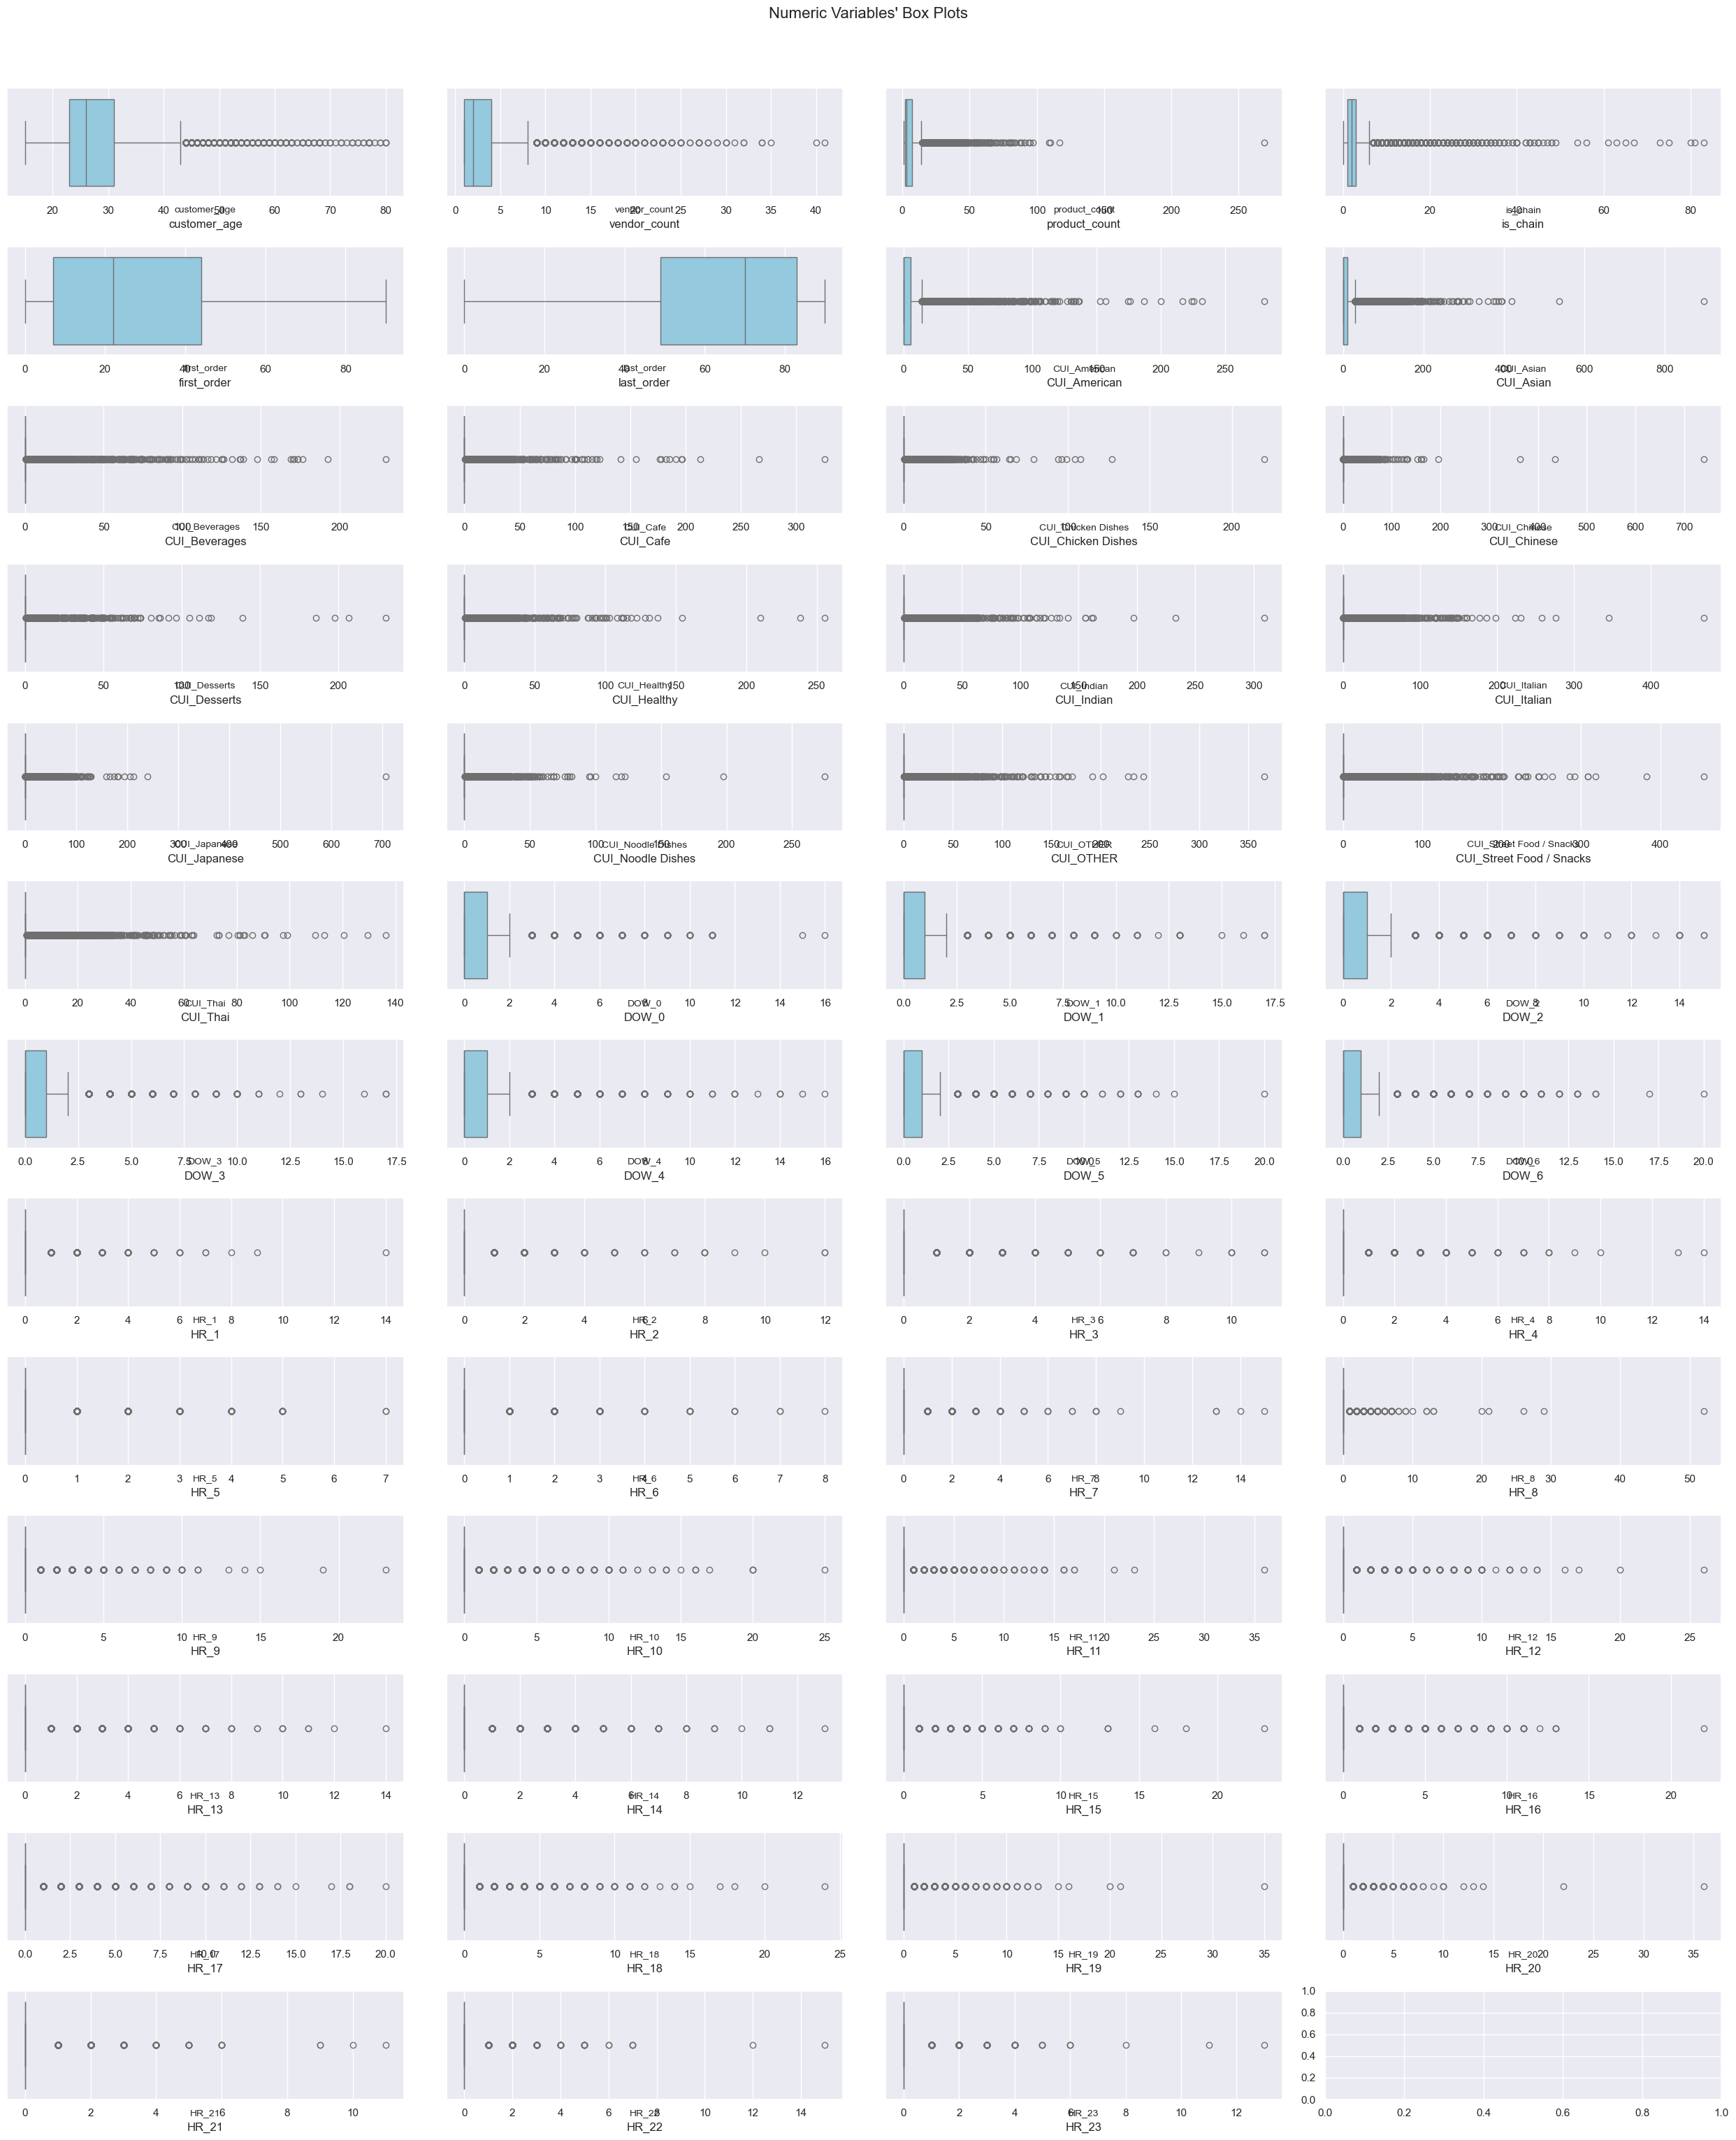

In [23]:
sns.set()

# Set up the figure and axes
rows, cols = 13, 4  
fig, axes = plt.subplots(rows, cols, figsize=(25, 30))  

# Plot each feature as a box plot
for ax, feat in zip(axes.flatten(), numerical_df):
    sns.boxplot(data=df, x=feat, ax=ax, color='skyblue')  
    ax.set_title(feat, fontsize=10, y=-0.2)  #

# Hide unused subplots:
for ax in axes.flatten()[len(numerical_df):]:
    ax.set_visible(False)

# Set a global title and adjust layout
plt.suptitle("Numeric Variables' Box Plots", fontsize=16, y=1.02)  
plt.tight_layout()
plt.show()

2. Outliers removal

There is two methods to treat with outliers:
- Automatic method 
- Manual method

We will try those two and compare which is better in our database.

- Using the Automatic method:

In [24]:
# Compute the inter-quartile range
q1 = df[numerical_features].quantile(0.25)
q3 = df[numerical_features].quantile(0.75)
iqr = q3 - q1

# Compute the limits:
lower_lim = q1 - (1.5 * iqr)
upper_lim = q3 + (1.5 * iqr)

for feature in numerical_features:
    print(f"{feature:<25}  Lower Limit: {lower_lim[feature]:>10}      Upper Limit: {upper_lim[feature]:>10}")

customer_age               Lower Limit:       11.0      Upper Limit:       43.0
vendor_count               Lower Limit:       -3.5      Upper Limit:        8.5
product_count              Lower Limit:       -5.5      Upper Limit:       14.5
is_chain                   Lower Limit:       -2.0      Upper Limit:        6.0
first_order                Lower Limit:      -48.5      Upper Limit:       99.5
last_order                 Lower Limit:       -2.0      Upper Limit:      134.0
CUI_American               Lower Limit:     -8.565      Upper Limit: 14.274999999999999
CUI_Asian                  Lower Limit:     -17.79      Upper Limit:      29.65
CUI_Beverages              Lower Limit:        0.0      Upper Limit:        0.0
CUI_Cafe                   Lower Limit:        0.0      Upper Limit:        0.0
CUI_Chicken Dishes         Lower Limit:        0.0      Upper Limit:        0.0
CUI_Chinese                Lower Limit:        0.0      Upper Limit:        0.0
CUI_Desserts               Lower

Observations in which all features are outliers:

In [25]:
outliers, obvious_outliers = identify_outliers(df, numerical_features, lower_lim, upper_lim)

Total outliers in customer_age: 1078
Total outliers in vendor_count: 1523
Total outliers in product_count: 2370
Total outliers in is_chain: 3154
Total outliers in first_order: 0
Total outliers in last_order: 0
Total outliers in CUI_American: 3482
Total outliers in CUI_Asian: 3462
Total outliers in CUI_Beverages: 5431
Total outliers in CUI_Cafe: 1366
Total outliers in CUI_Chicken Dishes: 3248
Total outliers in CUI_Chinese: 3522
Total outliers in CUI_Desserts: 2016
Total outliers in CUI_Healthy: 2169
Total outliers in CUI_Indian: 3448
Total outliers in CUI_Italian: 6448
Total outliers in CUI_Japanese: 6300
Total outliers in CUI_Noodle Dishes: 2226
Total outliers in CUI_OTHER: 7041
Total outliers in CUI_Street Food / Snacks: 4244
Total outliers in CUI_Thai: 2378
Total outliers in DOW_0: 1405
Total outliers in DOW_1: 1495
Total outliers in DOW_2: 1587
Total outliers in DOW_3: 1653
Total outliers in DOW_4: 1784
Total outliers in DOW_5: 1707
Total outliers in DOW_6: 1978
Total outliers in HR

Conclusion: There is no observation in which all features are outliers. Since there is no outlier in 'HR_0', 'last_order', 'first_order'.

Check if there is any observation only with outliers, except on these features.

In [26]:
metric_features_test = numerical_df.drop(columns=['last_order', 'first_order'])

outliers, obvious_outliers = identify_outliers(df, metric_features_test, lower_lim, upper_lim)

Total outliers in customer_age: 1078
Total outliers in vendor_count: 1523
Total outliers in product_count: 2370
Total outliers in is_chain: 3154
Total outliers in CUI_American: 3482
Total outliers in CUI_Asian: 3462
Total outliers in CUI_Beverages: 5431
Total outliers in CUI_Cafe: 1366
Total outliers in CUI_Chicken Dishes: 3248
Total outliers in CUI_Chinese: 3522
Total outliers in CUI_Desserts: 2016
Total outliers in CUI_Healthy: 2169
Total outliers in CUI_Indian: 3448
Total outliers in CUI_Italian: 6448
Total outliers in CUI_Japanese: 6300
Total outliers in CUI_Noodle Dishes: 2226
Total outliers in CUI_OTHER: 7041
Total outliers in CUI_Street Food / Snacks: 4244
Total outliers in CUI_Thai: 2378
Total outliers in DOW_0: 1405
Total outliers in DOW_1: 1495
Total outliers in DOW_2: 1587
Total outliers in DOW_3: 1653
Total outliers in DOW_4: 1784
Total outliers in DOW_5: 1707
Total outliers in DOW_6: 1978
Total outliers in HR_1: 1283
Total outliers in HR_2: 1490
Total outliers in HR_3: 252

Conclusion: There is no observation with outliers in all features.

Observations in which at least one feature is an outlier:

In [27]:
filters_iqr = []                                            
for metric in numerical_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters_iqr.append(df[metric].between(llim, ulim, inclusive='neither'))

filters_iqr_all = pd.concat(filters_iqr, axis=1).all(axis=1)

In [28]:
filters_iqr_all

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [29]:
len(df[~filters_iqr_all])
# Number of observations with at least one features considered an outlier
percentage_outliers = len(df[filters_iqr_all])/len(df)*100
percentage_data_kept = round(100 - percentage_outliers, 5)
print(f"Percentage of observations with at least one features considered an outlier: {percentage_outliers}%")
print(f"Percentage of data kept after removing outliers: {percentage_data_kept}%")

Percentage of observations with at least one features considered an outlier: 0.0%
Percentage of data kept after removing outliers: 100.0%


Conclusion: All observations have outliers in some feature

- Using the manual method:

In [30]:
filters_manual1 = (
                (df["customer_age"] <= 70) #??
                &
                (df["vendor_count"] <= 30) #??
                &
                (df["product_count"] <= 100)                            
                &
                (df["is_chain"] <= 55)                                  
                &
                (df["CUI_American"] <= 150)
                &
                (df["CUI_Asian"] <= 450)                            
                &
                (df["CUI_Beverages"] <= 150)  
                &
                (df["CUI_Cafe"] <= 140)
                &
                (df["CUI_Chicken Dishes"] <= 70)                            
                &
                (df["CUI_Chinese"] <= 200)                                  
                &
                (df["CUI_Desserts"] <= 80)
                &
                (df["CUI_Healthy"] <= 150)                            
                &
                (df["CUI_Indian"] <= 150)
                &
                (df["CUI_Italian"] <= 200)
                &
                (df["CUI_Japanese"] <= 150)
                &
                (df["CUI_Noodle Dishes"] <= 90)
                &
                (df["CUI_OTHER"] <= 180)
                &
                (df["CUI_Street Food / Snacks"] <= 210)
                &
                (df["CUI_Thai"] <= 70)
                &
                (df["DOW_0"] <= 12)
                &
                (df["DOW_1"] <= 14)
                &
                (df["DOW_2"] <= 10) #(??)
                &
                (df["DOW_3"] <= 12)
                &
                (df["DOW_4"] <=12) #(??)
                &
                (df["DOW_5"] <= 12) #(??)
                &
                (df["DOW_6"] <= 15)
                &
                (df["HR_1"] <= 10)                                  
                &
                (df["HR_2"] < 8)
                &
                (df["HR_3"] <= 8) #(??)                            
                &
                (df["HR_4"] <= 8)                       
                &
                (df["HR_5"] <= 5)                                  
                &
                (df["HR_6"] <= 6)
                &
                (df["HR_7"] <= 10)                            
                &
                (df["HR_8"] <= 19)  
                &
                (df["HR_9"] <= 12)
                &
                (df["HR_10"] < 15)                            
                &
                (df["HR_11"] <= 15)                                  
                &
                (df["HR_12"] <= 15)
                &
                (df["HR_13"] <= 10)                            
                &
                (df["HR_14"] <= 10) 
                &
                (df["HR_15"] <= 12)  
                &
                (df["HR_16"] <= 15)
                &
                (df["HR_17"] <= 16)
                &
                (df["HR_18"] <= 15)                                  
                &
                (df["HR_19"] <= 15)
                &
                (df["HR_20"] <= 15)                            
                &
                (df["HR_21"] <= 7)
                &
                (df["HR_22"] <= 8)
                &
                (df["HR_23"] <= 7)    
)                     

df_out_man1 = df[filters_manual1]

In [31]:
print('Percentage of data kept after removing outliers:', 100*(np.round(df_out_man1.shape[0] / df.shape[0], decimals=5)))

Percentage of data kept after removing outliers: 99.263


In [32]:
filters_manual2 = (
                (df["customer_age"] <= 70) 
                &
                (df["vendor_count"] <= 35) 
                &
                (df["product_count"] <= 80)                          
                &
                (df["is_chain"] <= 40)                                 
                &
                (df["CUI_American"] <= 100)
                &
                (df["CUI_Asian"] <= 300) #200                           
                &
                (df["CUI_Beverages"] <= 100)  
                &
                (df["CUI_Cafe"] <= 120)  
                &
                (df["CUI_Chicken Dishes"] <= 55) #50                           
                &
                (df["CUI_Chinese"] <= 150)                                
                &
                (df["CUI_Desserts"] <= 70) #100
                &
                (df["CUI_Healthy"] <= 120)                           
                &
                (df["CUI_Indian"] <= 120)  
                &
                (df["CUI_Italian"] <= 150)
                &
                (df["CUI_Japanese"] <= 120) 
                &
                (df["CUI_Noodle Dishes"] <= 70)
                &
                (df["CUI_OTHER"] <= 120)
                &
                (df["CUI_Street Food / Snacks"] <= 200)
                &
                (df["CUI_Thai"] <= 60)
                &
                (df["DOW_0"] <= 12) #8
                &
                (df["DOW_1"] <= 12) #8
                &
                (df["DOW_2"] <= 12) #8
                &
                (df["DOW_3"] <= 12) #8
                &
                (df["DOW_4"] <=12) #8
                &
                (df["DOW_5"] <= 13) #8
                &
                (df["DOW_6"] <= 13) #10
                &
                (df["HR_1"] <= 8)                                 
                &
                (df["HR_2"] < 8) 
                &
                (df["HR_3"] <= 8)                             
                &
                (df["HR_4"] < 10)                       
                &
                (df["HR_5"] < 5)                                  
                &
                (df["HR_6"] <= 5)
                &
                (df["HR_7"] <= 5)                            
                &
                (df["HR_8"] <= 15)  #10
                &
                (df["HR_9"] <= 13) #10
                &
                (df["HR_10"] < 15) #10                         
                &
                (df["HR_11"] <= 15)  #10                                
                &
                (df["HR_12"] < 10) #10
                &
                (df["HR_13"] < 8)  #6                          
                &
                (df["HR_14"] < 8) 
                &
                (df["HR_15"] < 10)  
                &
                (df["HR_16"] <= 15) #10
                &
                (df["HR_17"] < 15) #10
                &
                (df["HR_18"] < 12) #10                                 
                &
                (df["HR_19"] < 15) 
                &
                (df["HR_20"] < 10)                            
                &
                (df["HR_21"] < 6)
                &
                (df["HR_22"] < 8)
                &
                (df["HR_23"] < 6)    
)                     

df_out_man2 = df[filters_manual2]

In [33]:
print('Percentage of data kept after removing outliers:', 100*(np.round(df_out_man2.shape[0] / df.shape[0], decimals=5)))

Percentage of data kept after removing outliers: 98.72999999999999


In [34]:
filters_manual3 = (
                (df["customer_age"] <= 70) 
                &
                (df["vendor_count"] <= 35) 
                &
                (df["product_count"] <= 80)                          
                &
                (df["is_chain"] <= 40)                                 
                &
                (df["CUI_American"] <= 100)
                &
                (df["CUI_Asian"] <= 200) #200                           
                &
                (df["CUI_Beverages"] <= 100)  
                &
                (df["CUI_Cafe"] <= 120)  
                &
                (df["CUI_Chicken Dishes"] <= 50) #50                           
                &
                (df["CUI_Chinese"] <= 150)                                
                &
                (df["CUI_Desserts"] <= 100) #100
                &
                (df["CUI_Healthy"] <= 120)                           
                &
                (df["CUI_Indian"] <= 120)  
                &
                (df["CUI_Italian"] <= 150)
                &
                (df["CUI_Japanese"] <= 120) 
                &
                (df["CUI_Noodle Dishes"] <= 70)
                &
                (df["CUI_OTHER"] <= 120)
                &
                (df["CUI_Street Food / Snacks"] <= 200)
                &
                (df["CUI_Thai"] <= 60)
                &
                (df["DOW_0"] <= 8) #8
                &
                (df["DOW_1"] <= 8) #8
                &
                (df["DOW_2"] <= 8) #8
                &
                (df["DOW_3"] <= 8) #8
                &
                (df["DOW_4"] <=8) #8
                &
                (df["DOW_5"] <=8) #8
                &
                (df["DOW_6"] <= 10) #10
                &
                (df["HR_1"] <= 8)                                 
                &
                (df["HR_2"] < 8) 
                &
                (df["HR_3"] <= 8)                             
                &
                (df["HR_4"] < 10)                       
                &
                (df["HR_5"] < 5)                                  
                &
                (df["HR_6"] <= 5)
                &
                (df["HR_7"] <= 5)                            
                &
                (df["HR_8"] <= 10)  #10
                &
                (df["HR_9"] <= 10) #10
                &
                (df["HR_10"] < 10) #10                         
                &
                (df["HR_11"] <= 10)  #10                                
                &
                (df["HR_12"] < 10) #10
                &
                (df["HR_13"] < 6)  #6                          
                &
                (df["HR_14"] < 8) 
                &
                (df["HR_15"] < 10)  
                &
                (df["HR_16"] <= 10) #10
                &
                (df["HR_17"] < 10) #10
                &
                (df["HR_18"] < 10) #10                                 
                &
                (df["HR_19"] < 15) 
                &
                (df["HR_20"] < 10)                            
                &
                (df["HR_21"] < 6)
                &
                (df["HR_22"] < 8)
                &
                (df["HR_23"] < 6)    
)                     

df_out_man3 = df[filters_manual3]

In [35]:
# Number of observations with at least one features considered an outlier
percentage_data_kept_manual = 100*(np.round(df_out_man3.shape[0] / df.shape[0], decimals=5))
percentage_outliers_manual = round(100 - percentage_data_kept_manual, 5)
print(f"Percentage of observations with at least one features considered an outlier: {percentage_outliers_manual}%")
print(f"Percentage of data kept after removing outliers: {percentage_data_kept_manual}%")

Percentage of observations with at least one features considered an outlier: 1.73%
Percentage of data kept after removing outliers: 98.27%


We conclude that we should see what is common to both methods and remove only that because the automatic method is removing a very high percentage of the data.

In [36]:
df = df[(filters_iqr_all | filters_manual3)]

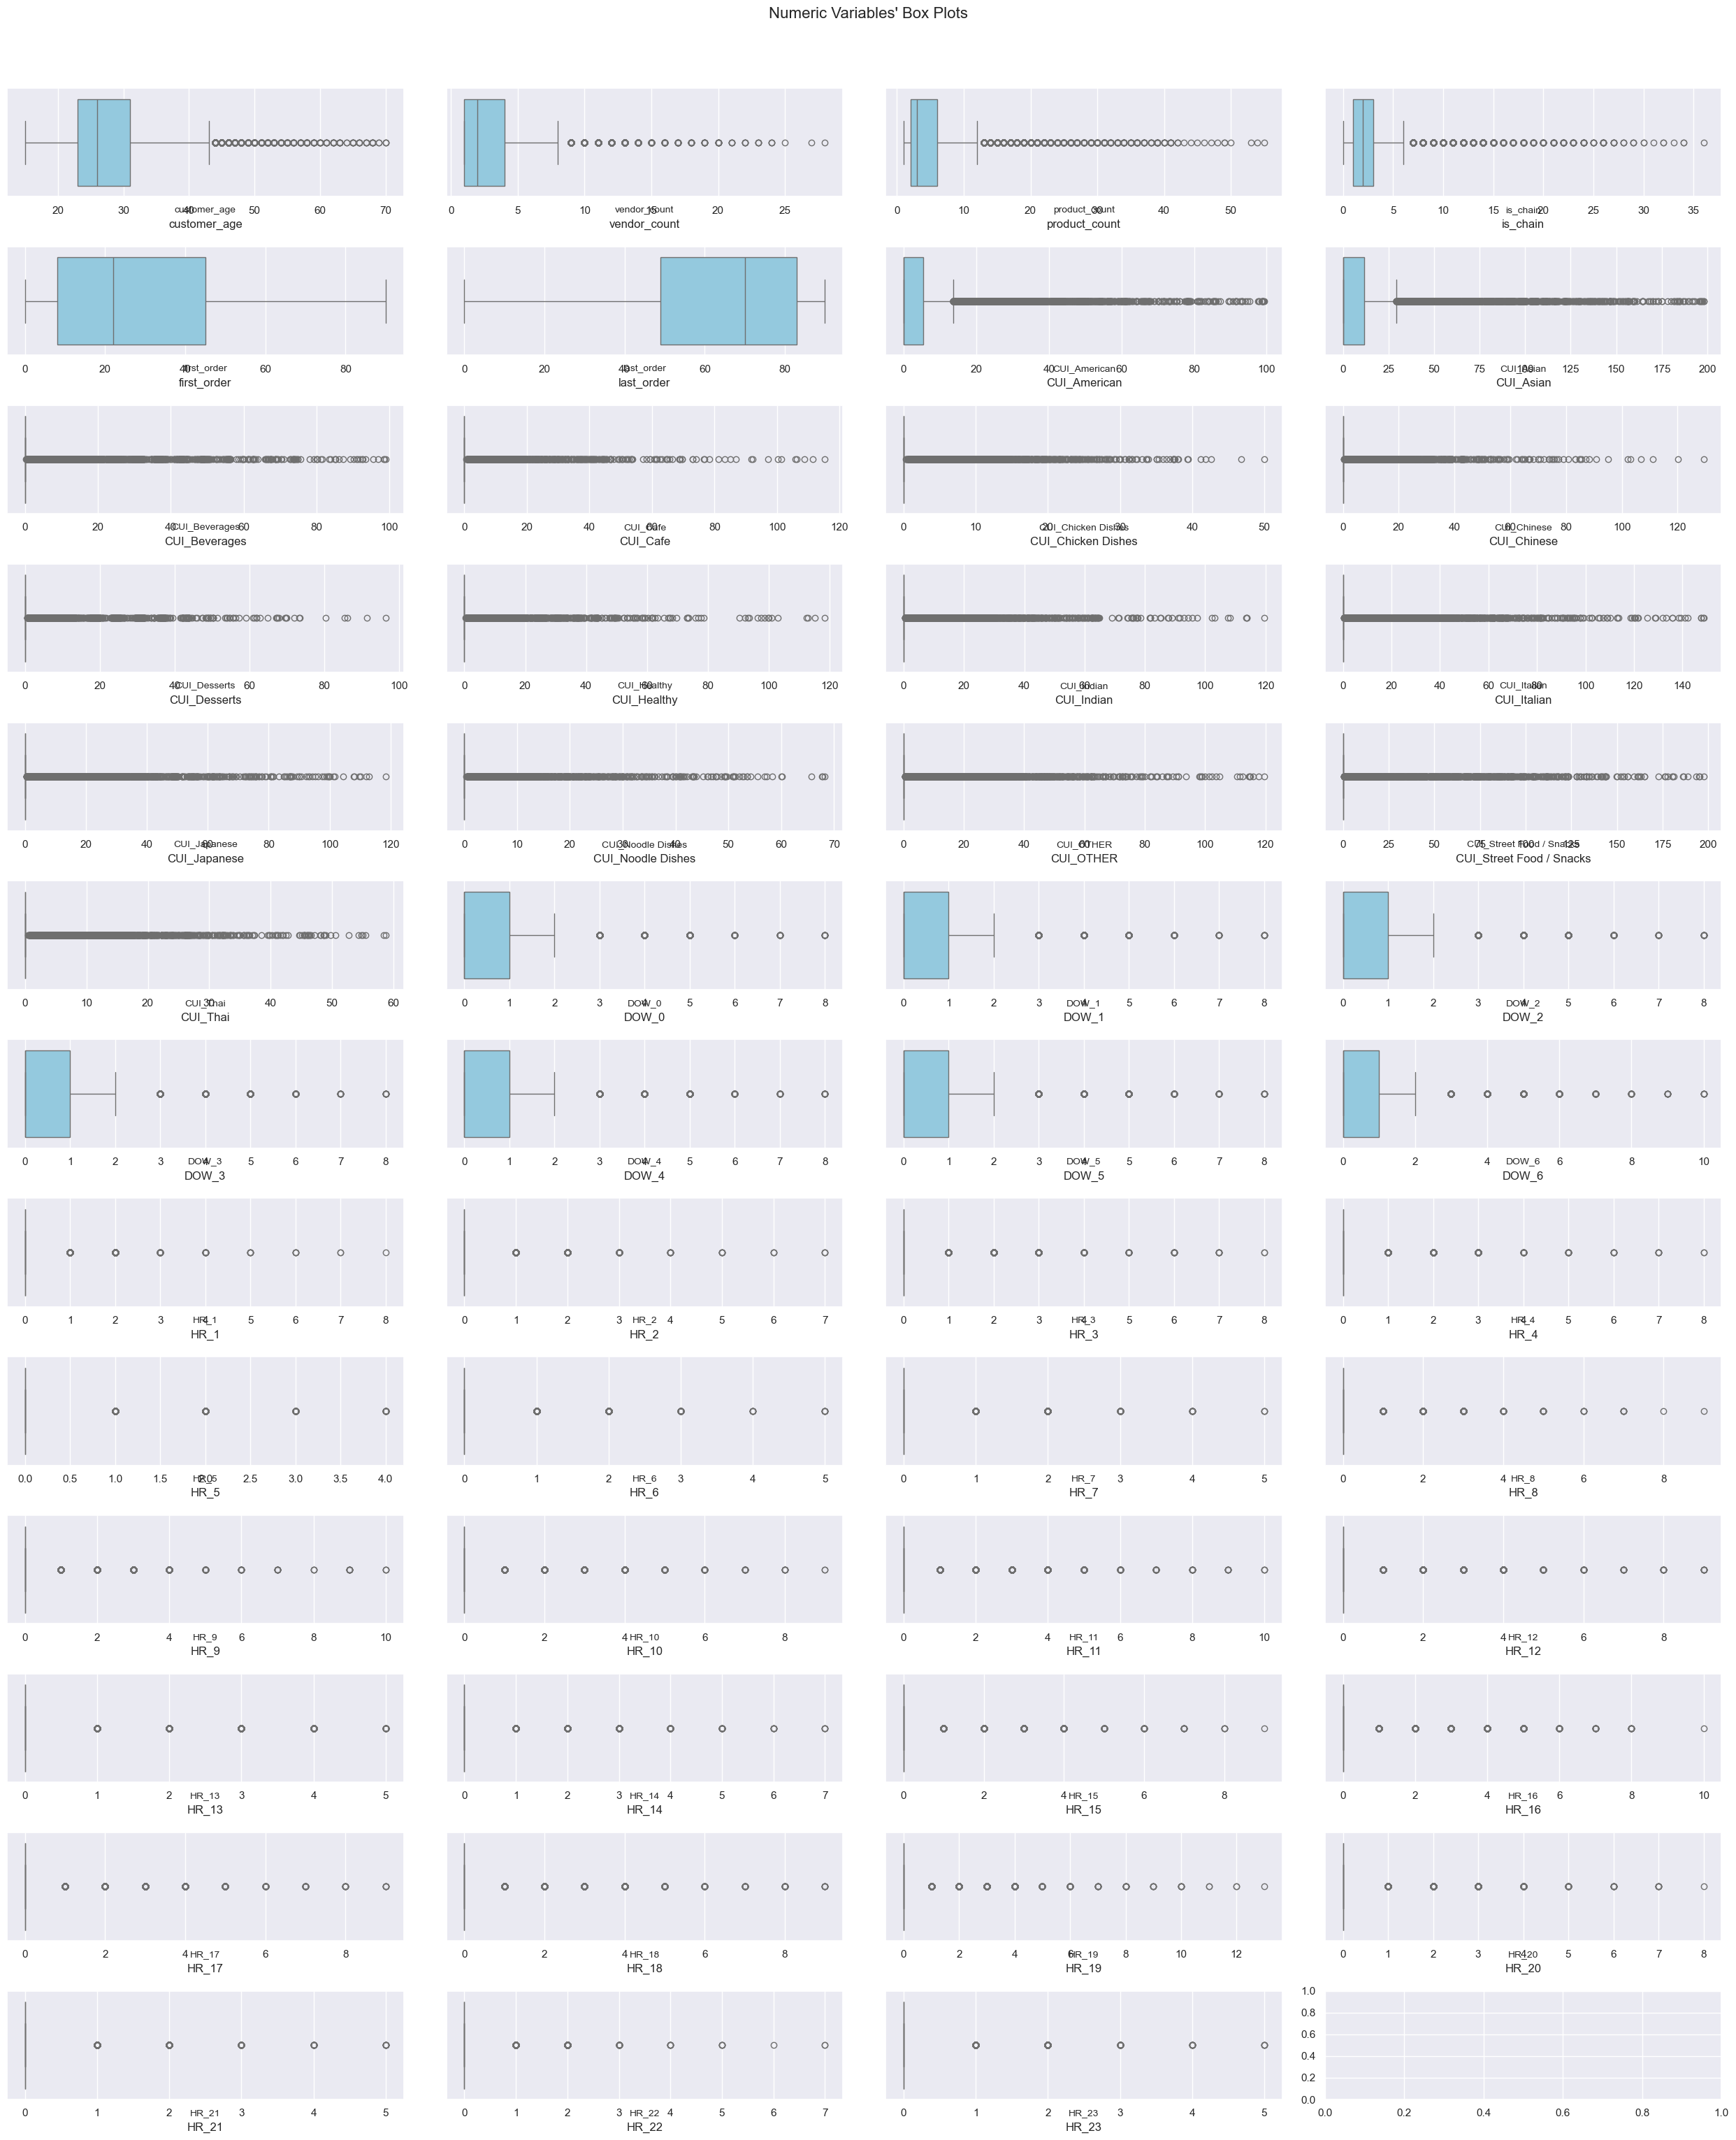

In [37]:
sns.set()

# Set up the figure and axes
rows, cols = 13, 4  
fig, axes = plt.subplots(rows, cols, figsize=(25, 30))  

# Plot each feature as a box plot
for ax, feat in zip(axes.flatten(), numerical_df):
    sns.boxplot(data=df, x=feat, ax=ax, color='skyblue')  
    ax.set_title(feat, fontsize=10, y=-0.2)  #

# Hide unused subplots:
for ax in axes.flatten()[len(numerical_df):]:
    ax.set_visible(False)

# Set a global title and adjust layout
plt.suptitle("Numeric Variables' Box Plots", fontsize=16, y=1.02)  
plt.tight_layout()
plt.show()

<a class="anchor" id="seven-bullet"> 

## <span style="color:salmon"> 7. Export Datasets</span> 

<a href="#top">Top &#129033;</a>

In [38]:
# Store in df_preprocessing the DataFrame of our dataset df
df_preprocessing = pd.DataFrame(df)

# Save to CSV
df_preprocessing.to_csv('../dataset/df_preprocessing.csv', index=False)